In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config Completer.use_jedi = False

In [2]:
hourly_data = pd.read_csv("data/hour.csv")

In [3]:
# print the generic statistics about data
print(f"Shape of the data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

Shape of the data: (17379, 17)
Number of missing values in the data: 0


In [4]:
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [5]:
preprocessed_data = hourly_data.copy()

### Transforming data into more human-readable format

In [6]:
# transform seasons
seasons_mapping = {1:"Winter", 2:"Spring", \
                  3:"Summer", 4:"Fall"}

preprocessed_data["season"] = preprocessed_data["season"]\
.apply(lambda x: seasons_mapping[x])

In [7]:
# transforming year
yr_mapping = {0: 2011, 1:2012}

preprocessed_data["yr"] = preprocessed_data["yr"].\
apply(lambda x: yr_mapping[x])

In [8]:
# transforming weekday
weekday_mapping = {0: "Sunday", 1:"Monday", 2:"Tuesday",\
                  3:"Wednesday", 4:"Thursday", 5:"Friday",\
                  6:"Saturday"}

preprocessed_data["weekday"] = preprocessed_data["weekday"]\
.apply(lambda x: weekday_mapping[x])

In [9]:
# transform weathersit
weather_mapping = {1:"Clear", 2:"Cloudy",3:\
                   "Light rain\/snow",4:"Heavy rain\/snow"}

preprocessed_data["weathersit"] = preprocessed_data["weathersit"]\
.apply(lambda x: weather_mapping[x])

In [10]:
preprocessed_data["hum"] *= 100
preprocessed_data["windspeed"] *= 67

In [11]:
# temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), 
# t_min=-8, t_max=+39 (only in hourly scale)

preprocessed_data["temp"] = preprocessed_data["temp"] * 47 - 8

In [12]:
# atemp: Normalized feeling temperature in Celsius. The values are derived via 
# (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 

preprocessed_data["atemp"] = preprocessed_data["atemp"] * 66 - 16

In [13]:
cols = ["season", "yr", "weekday", "weathersit", "hum", "windspeed", "temp", "atemp"]

preprocessed_data[cols].sample(10)

,season,yr,weekday,weathersit,hum,windspeed,temp,atemp
3800,Spring,2011,Sunday,Clear,88.0,7.0015,21.14,20.9996
3553,Spring,2011,Wednesday,Clear,51.0,11.0014,26.78,28.0022
14407,Summer,2012,Tuesday,Clear,49.0,19.0012,29.60,32.9984
8995,Winter,2012,Sunday,Clear,29.0,19.9995,2.34,-2.0014
7466,Fall,2011,Saturday,Clear,34.0,16.9979,15.50,15.9968
2588,Spring,2011,Friday,Light rain\/snow,93.0,15.0013,7.04,3.9980
14533,Summer,2012,Sunday,Clear,74.0,0.0000,26.78,30.9986
11183,Spring,2012,Monday,Clear,77.0,15.0013,17.38,18.0032
10393,Winter,2012,Wednesday,Clear,67.0,6.0032,14.56,15.0002
13968,Summer,2012,Friday,Light rain\/snow,84.0,19.0012,24.90,28.0022


In [14]:
assert (preprocessed_data.casual \
       + preprocessed_data.registered \
       == preprocessed_data.cnt).all(), \
"Sum of casual and registered rides not equal to the total number of rides"

In [15]:
import random

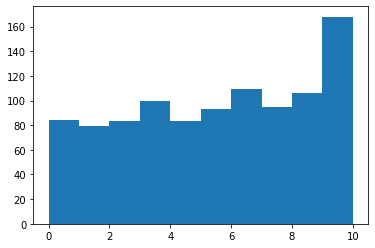

In [16]:
plt.hist(pd.Series([random.randint(0,10) for i in range(1000)]));

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


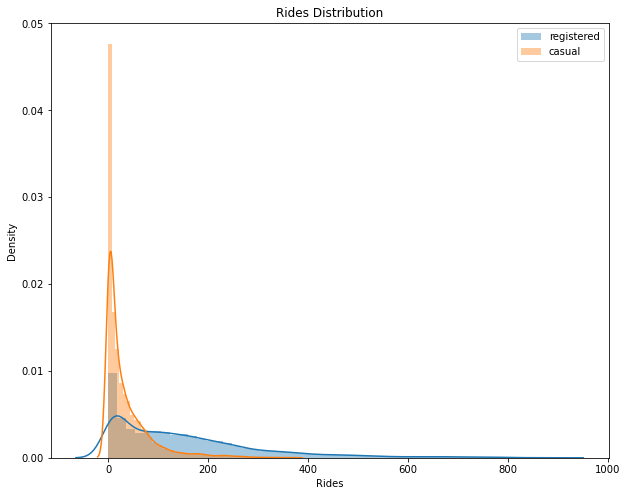

In [17]:
plt.figure(figsize=(10,8))
sns.distplot(preprocessed_data.registered, label="registered")
sns.distplot(preprocessed_data.casual, label="casual")
plt.legend()
plt.xlabel("Rides")
plt.title("Rides Distribution")
plt.savefig("figs/rides_distributions.png", format="png")

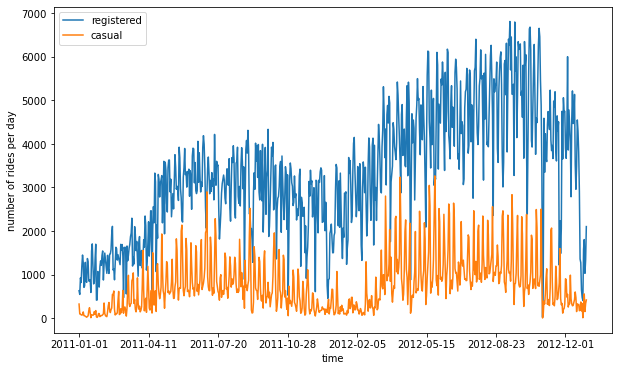

In [18]:
# plot time series of rides

plot_data = preprocessed_data[["registered", "casual", "dteday"]].sample(frac=0.9)
ax = plot_data.groupby('dteday').sum().plot(figsize=(10, 6))
ax.set_xlabel("time");
ax.set_ylabel("number of rides per day")
plt.savefig('figs/rides_daily.png', format="png")

<font color="purple">

### Moving Average to make it smoother 

In [19]:
'''
Create new dataframe with necessary columns for plotting, and obtain the number
of rides per day, by grouping over each day
'''
plot_data = preprocessed_data[["registered", "casual", "dteday"]]
plot_data = plot_data.groupby("dteday").sum()

In [20]:
plot_data.head()

,registered,casual
dteday,,
2011-01-01,654,331
2011-01-02,670,131
2011-01-03,1229,120
2011-01-04,1454,108
2011-01-05,1518,82


In [21]:
# define window for computing the rolling mean and standard deviation
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()

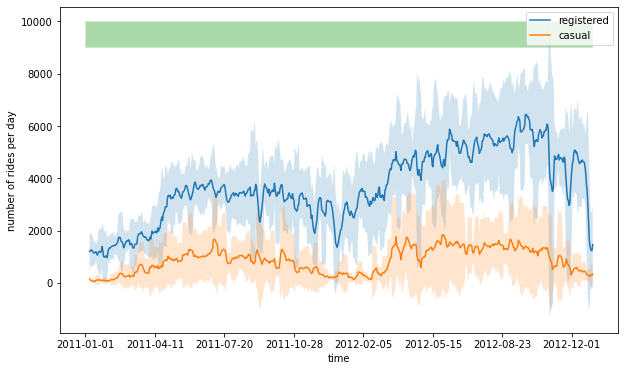

In [22]:
"""
Create a plot of the series, where we first plot the series of rolling means, then we color 
the zone between the series of rolling means +- 2 rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10,6))

ax.fill_between(rolling_means.index, rolling_means["registered"] + \
                2 * rolling_deviations["registered"], \
                rolling_means["registered"] - \
                2 * rolling_deviations["registered"], \
                alpha = 0.2)

ax.fill_between(rolling_means.index, rolling_means["casual"] \
                + 2 * rolling_deviations["casual"], \
                rolling_means["casual"] - \
                2 * rolling_deviations["casual"], \
                alpha = 0.2)

ax.fill_between(rolling_means.index,
                np.array([10000]*rolling_means.shape[0]),
                pd.Series([9000]*rolling_means.shape[0]),
                alpha = 0.4)

ax.set_xlabel("time");
ax.set_ylabel("number of rides per day");
plt.savefig("figs/rides_aggregated.png", format="png");

Let's now focus on the distributions of the requests over separate hours and days of the week. We should expect certain time patterns to arise, as bike requests should be more frequent during certain hours of the day, depending on the day of the week.

In [23]:
plot_data = preprocessed_data[["hr", "weekday", "registered", "casual"]]

In [24]:
df = plot_data.groupby(["hr", "weekday"], as_index=False).mean()
df.head()

df = plot_data.groupby(["hr", "weekday"]).mean()
df = df.reset_index()
df.head()

,hr,weekday,registered,casual
0,0,Friday,43.182692,9.250000
1,0,Monday,24.590476,9.419048
2,0,Saturday,78.790476,15.514286
3,0,Sunday,75.759615,18.230769
4,0,Thursday,32.427184,6.844660


In [25]:
df.shape

(168, 4)

In [26]:
"""
transform the data into a format, in number of entries are computed as 
count, for each distinct hr, weekday and type (registered or casual)
"""
plot_data = plot_data.melt(id_vars=["hr", "weekday"], \
                          var_name="type", value_name="count")



In [27]:
df = df.melt(id_vars=["hr", "weekday"], var_name="type", value_name="count")

In [28]:
plot_data.query("weekday=='Saturday' and hr==0").groupby("type").head(20)

,hr,weekday,type,count
0,0,Saturday,registered,13
161,0,Saturday,registered,24
324,0,Saturday,registered,25
479,0,Saturday,registered,13
618,0,Saturday,registered,26
781,0,Saturday,registered,36
945,0,Saturday,registered,27
1110,0,Saturday,registered,23
1268,0,Saturday,registered,25
1433,0,Saturday,registered,15


In [29]:
plot_data.head()

,hr,weekday,type,count
0,0,Saturday,registered,13
1,1,Saturday,registered,32
2,2,Saturday,registered,27
3,3,Saturday,registered,10
4,4,Saturday,registered,1


C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


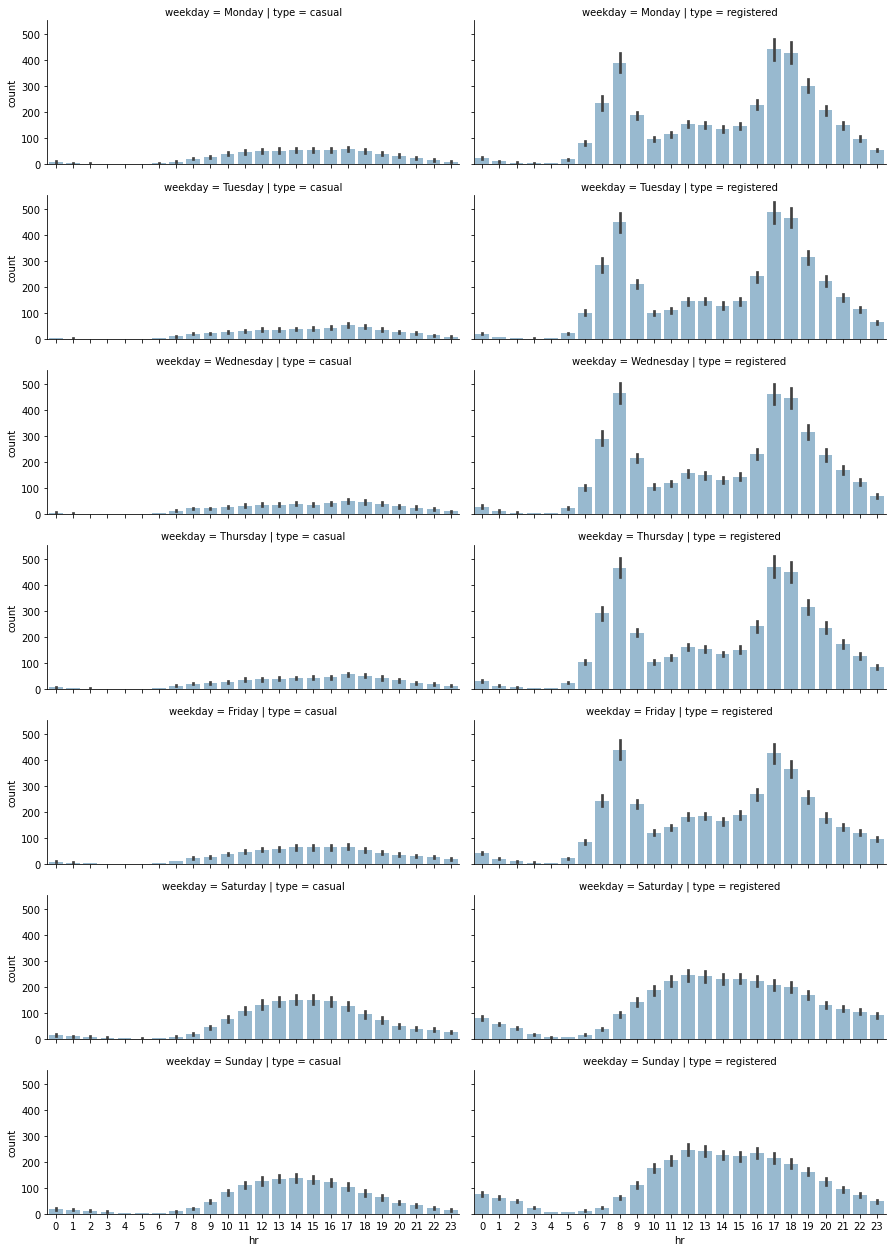

In [30]:
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (regi or cas)
"""
grid = sns.FacetGrid(plot_data, row="weekday", \
                    col="type", height=2.5, aspect=2.5, \
                    row_order=["Monday", "Tuesday", \
                               "Wednesday", "Thursday", \
                              "Friday", "Saturday", \
                              "Sunday"],
                    col_order=["casual", "registered"])

grid.map(sns.barplot, "hr", "count", alpha=0.5)
grid.savefig("figs/weekday_hour_distributions.png", format="png")

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


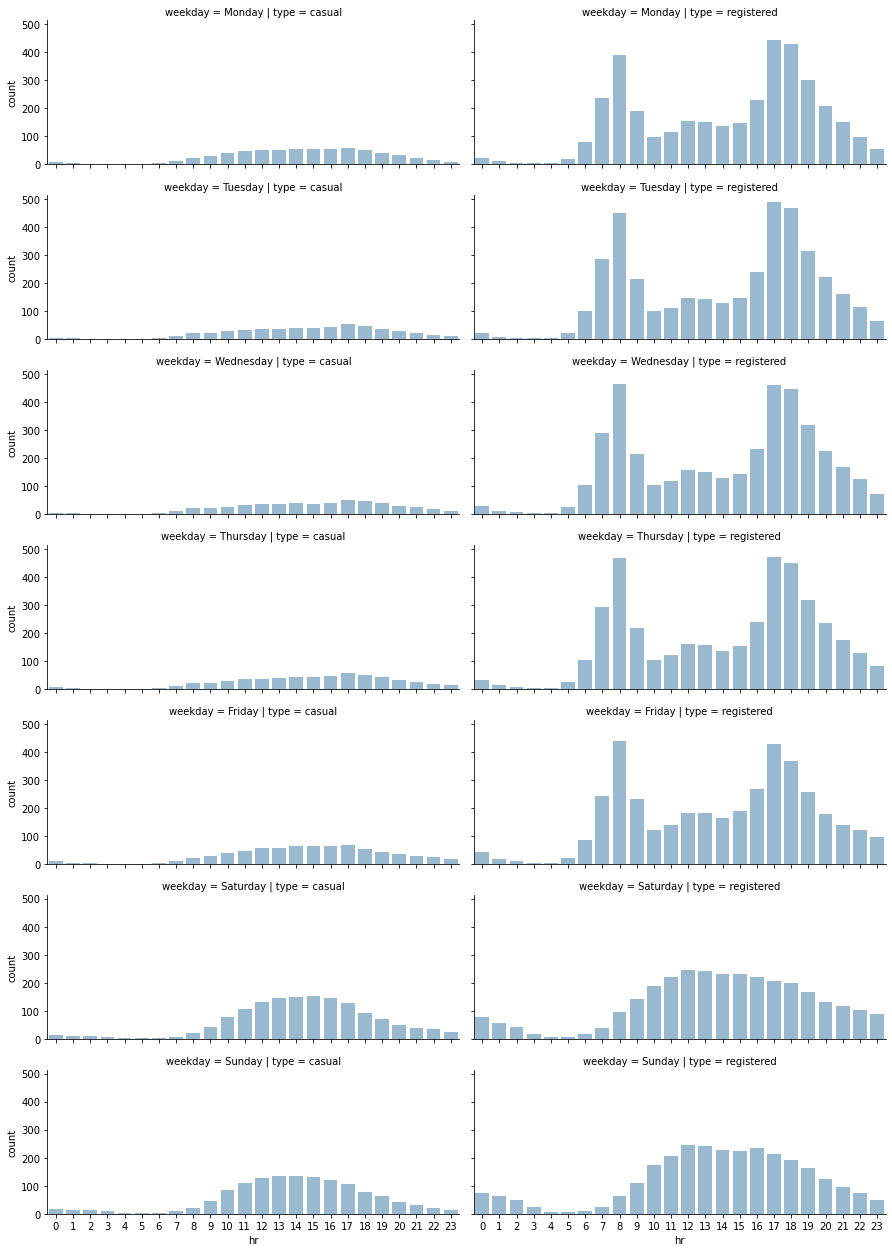

In [31]:
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (regi or cas)
"""
grid = sns.FacetGrid(df, row="weekday", \
                    col="type", height=2.5, aspect=2.5, \
                    row_order=["Monday", "Tuesday", \
                               "Wednesday", "Thursday", \
                              "Friday", "Saturday", \
                              "Sunday"],
                    col_order=["casual", "registered"])

grid.map(sns.barplot, "hr", "count", alpha=0.5)
grid.savefig("figs/avg_weekday_hour_distributions.png", format="png")

### Analyzing Seasonal Impact on Rides against Hours

In [32]:
plot_data = preprocessed_data[["hr", "season",
                              "registered", "casual"]]

In [33]:
# unpivot data from wide to long format
plot_data = plot_data.melt(id_vars=["hr", "season"],
                          var_name="type",
                          value_name="count")


In [34]:
plot_data.groupby(["hr","season","type"]).mean().head()

count
hr season type                 
0  Fall   casual       7.887006
          registered  48.446328
   Spring casual      12.402174
          registered  44.440217
   Summer casual      16.540107

In [35]:
df = plot_data.groupby(["hr","season","type"], as_index=False).mean().reset_index()

In [36]:
df.loc[0], type(df.loc[0])

(index            0
 hr               0
 season        Fall
 type        casual
 count     7.887006
 Name: 0, dtype: object,
 pandas.core.series.Series)

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


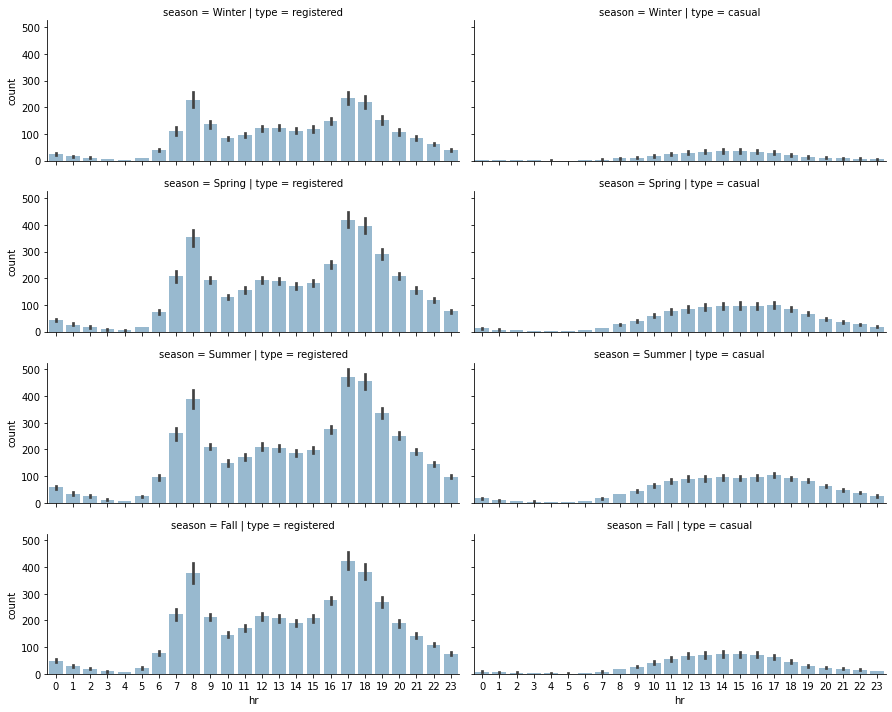

In [37]:
# define FaceGrid
grid = sns.FacetGrid(plot_data, row="season",
                    col="type", height=2.5,
                    aspect=2.5,
                    row_order=["Winter", "Spring",
                              "Summer", "Fall"])

# apply plotting function to each element in the grid
grid.map(sns.barplot, "hr", "count", alpha=0.5)

# save figure
grid.savefig('figs/seasonal_imapct.png', format="png")

C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


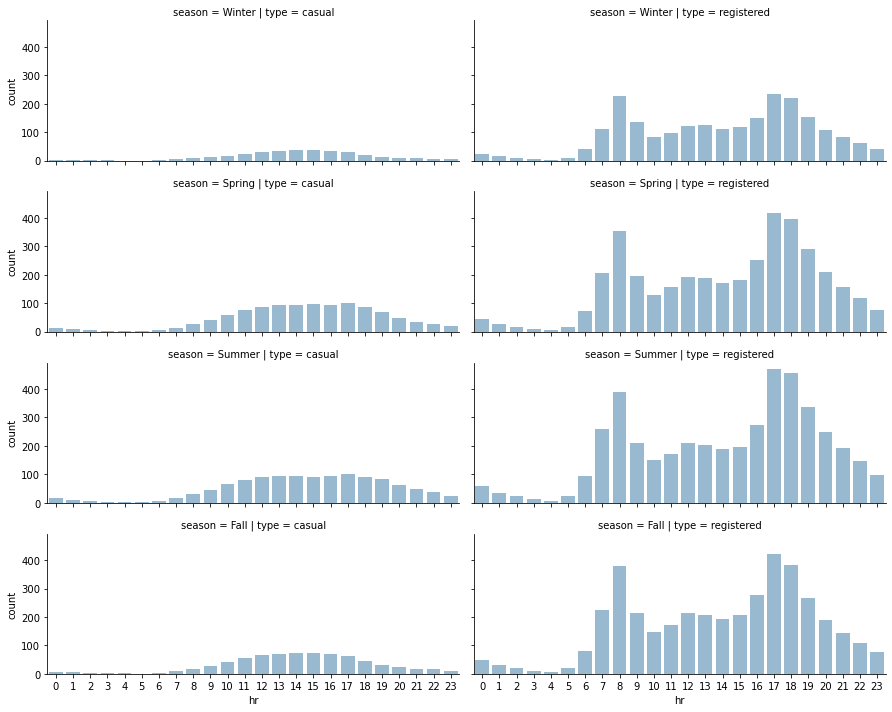

In [38]:
# define FaceGrid
grid = sns.FacetGrid(df, row="season",
                    col="type", height=2.5,
                    aspect=2.5,
                    row_order=["Winter", "Spring",
                              "Summer", "Fall"])

# apply plotting function to each element in the grid
grid.map(sns.barplot, "hr", "count", alpha=0.5)

# save figure
grid.savefig('figs/avg_seasonal_imapct.png', format="png")

### Analyzing Seasonal Impact on Rides against Weekdays

In [39]:
plot_data = preprocessed_data[["weekday","season",
                              "registered","casual"]]

plot_data = plot_data.melt(id_vars=["weekday", "season"],
                          var_name="type", value_name="cnt")

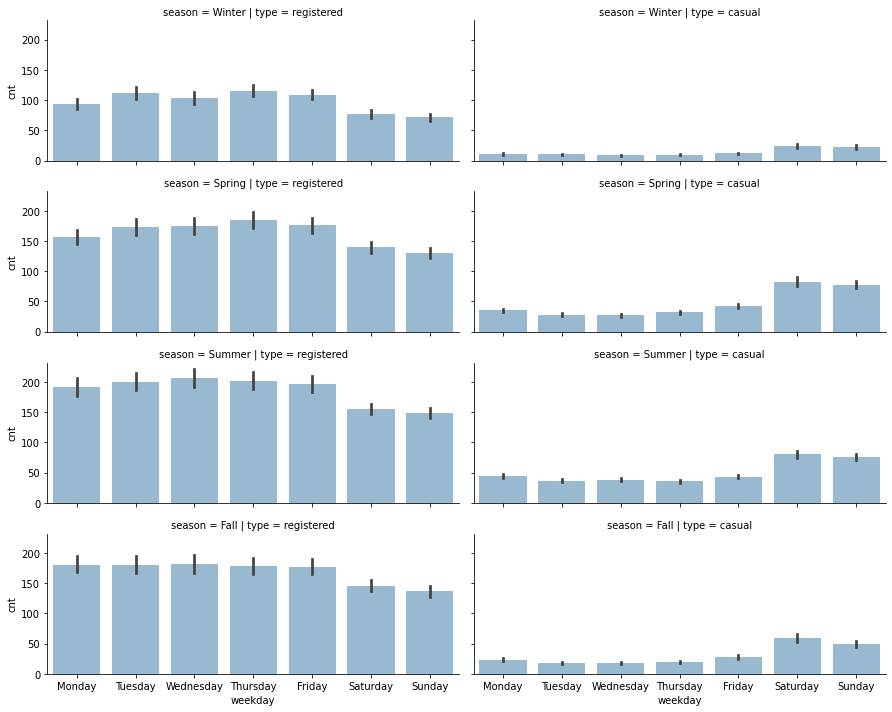

In [40]:
grid = sns.FacetGrid(plot_data, row="season", col="type",
                     height=2.5, aspect=2.5,
                    row_order=["Winter",'Spring',
                              "Summer", 'Fall'])

grid.map(sns.barplot, "weekday", "cnt",
         alpha=0.5,
        order=['Monday','Tuesday','Wednesday',
              'Thursday','Friday','Saturday',
              'Sunday']);

### Estimating Average Registered Rides

In [41]:
# compute population mean of registered rides
population_mean = preprocessed_data.registered.mean()

In [42]:
# get two samples of the data (one is summer 2011 and the other is a random sample)
sample_1 = preprocessed_data[(preprocessed_data.season \
                             == "Summer") \
                            & (preprocessed_data.yr \
                              == 2011)].registered
sample_2 = preprocessed_data.sample(frac=0.05, random_state=42).registered

In [43]:
sample_2.shape

(869,)

In [44]:
sample_1.shape

(2240,)

Specifying the significance level (which is often set to the standard value of 0.05) is important when performing the statistical test. Also be aware of the trade off between type 1 error and type 2 error.

In [45]:
# perform t-test and compute p-value
from scipy.stats import ttest_1samp
test_result_1 = ttest_1samp(sample_1, population_mean)
test_result_2 = ttest_1samp(sample_2, population_mean)
print(f"Test statistic for the first sample: {test_result_1[0]:.03f}, \
p-value: {test_result_1[1]:.03f}")
print(f"Test statistic for the second sample: {test_result_2[0]:.03f}, \
p-value: {test_result_2[1]:.03f}")

Test statistic for the first sample: -3.492, p-value: 0.000
Test statistic for the second sample: -0.678, p-value: 0.498


Please take a moment to justify what's going on here!

### Hypothesis Testing on Registered Rides

$H_0:\text{average registered rides over weekdays}-\text{average registered rides over weekend} = 0$

$H_a:\text{average registered rides over weekdays}-\text{average registered rides over weekend} \neq 0$

In [46]:
# define mask, indicating if the day is weekend or workday
weekend_days = ["Saturday", "Sunday"]
weekend_mask = preprocessed_data.weekday.isin(weekend_days)
workingdays_mask = ~preprocessed_data.weekday.isin(weekend_days)

# select registered rides for the weekend and working days
weekend_data = preprocessed_data[weekend_mask].registered
working_data = preprocessed_data[workingdays_mask].registered

In [47]:
preprocessed_data.registered[weekend_mask], preprocessed_data[weekend_mask].registered

(0        13
 1        32
 2        27
 3        10
 4         1
          ..
 17350    86
 17351    63
 17352    42
 17353    30
 17354    39
 Name: registered, Length: 5014, dtype: int64,
 0        13
 1        32
 2        27
 3        10
 4         1
          ..
 17350    86
 17351    63
 17352    42
 17353    30
 17354    39
 Name: registered, Length: 5014, dtype: int64)

In [48]:
# perform ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, working_data)
print(f"Statistic value: {test_res[0]:.03f}, \
p-value: {test_res[1]:.03f}")

Statistic value: -16.004, p-value: 0.000


C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2595: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\couzhei\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\couzhei\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future versio

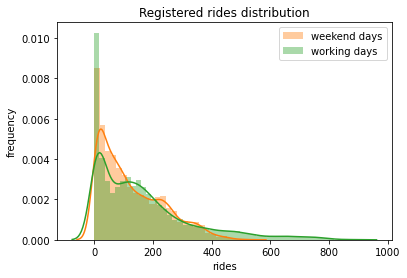

In [49]:
"""
plot distributions of registered rides for working vs weekend days
"""
# plt.figure(figsize=(20,9))
sns.distplot()
sns.distplot(weekend_data, label="weekend days")
sns.distplot(working_data, label="working days")
plt.legend()
plt.xlabel("rides")
plt.ylabel("frequency")
plt.title("Registered rides distribution")
plt.savefig("figs/registered_rides_distribution.png", format="png");

In [50]:
# now for casual users we're gonna perform the same hypothesis testing
working_data = preprocessed_data[workingdays_mask].casual
weekend_data = preprocessed_data[weekend_mask].casual

# performing the test
test_res = ttest_ind(weekend_data, working_data)
print(f"Statistic value: {test_res[0]:.3f},\
 p-value: {test_res[1]:.3f}")

Statistic value: 41.077, p-value: 0.000


C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\couzhei\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


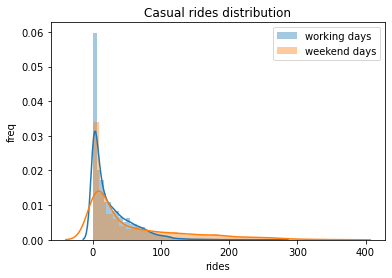

In [51]:
# plt.figure(figsize=(12,8))
sns.distplot(working_data, label="working days")
sns.distplot(weekend_data, label="weekend days")
plt.legend()
plt.xlabel("rides")
plt.ylabel("freq")
plt.title("Casual rides distribution")
plt.savefig("figs/casual_rides_distribution.png", format="png");

In [52]:
A = np.array([i for i in range(100)])
B = np.array([i**2 for i in range(100)])
np.corrcoef(A, B)

array([[1.        , 0.96764439],
       [0.96764439, 1.        ]])

### Analysis of Weather-Related Features

In [53]:
def plot_correlations(data, col):
    
    # get correlation between col and registered rides
    corr_r = np.corrcoef(data[col], data["registered"])[0, 1]
    ax = sns.regplot(x=col, y="registered", data=data, \
                    scatter_kws={"alpha":0.05}, \
                    label=f"Registered rides "+ \
                    f"(correlation: {corr_r:.3f})")
    
    # get correlation between col and casual rides
    corr_c = np.corrcoef(data[col], data["casual"])[0, 1]
    ax = sns.regplot(x=col, y="casual", data=data, \
                    scatter_kws={"alpha":0.05}, \
                     label="Casual rides (correlation" +\
                     f": {corr_c:.3f})")
    # adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax
    

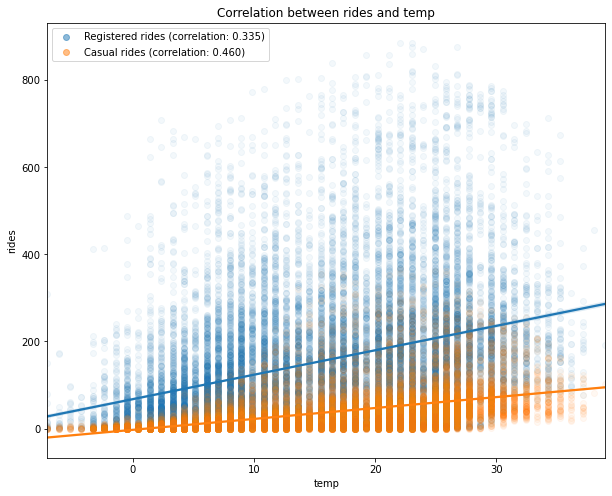

In [54]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'temp')
plt.savefig("figs/correlation_temp.png", format="png")

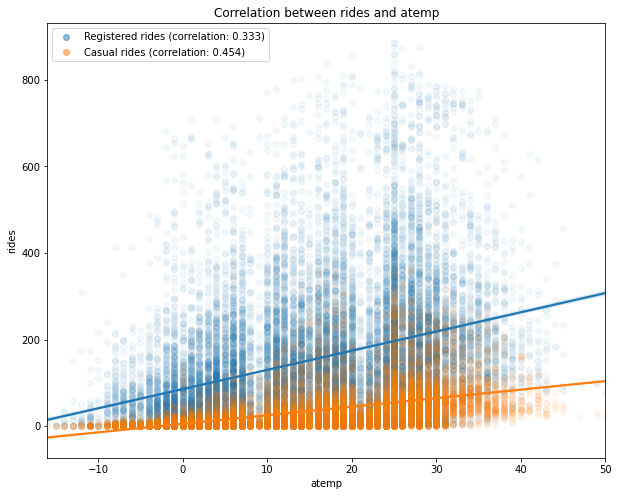

In [55]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'atemp')
plt.savefig("figs/correlation_atemp.png", format="png")

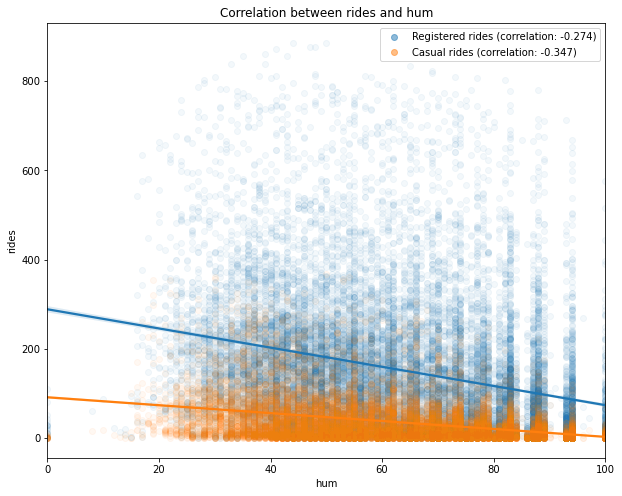

In [56]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'hum')
plt.savefig("figs/correlation_hum.png", format="png")

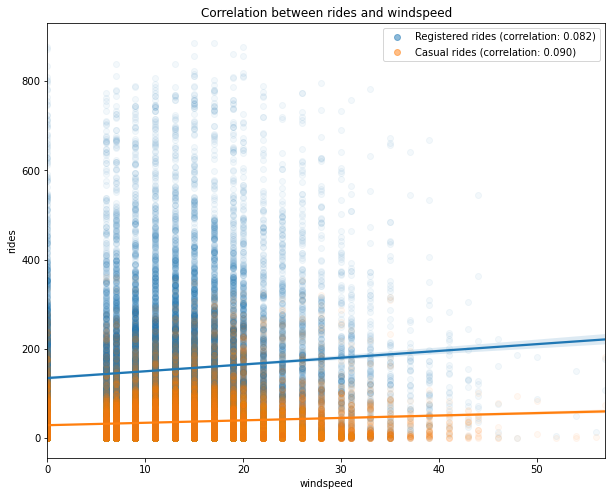

In [57]:
plt.figure(figsize=(10, 8))
ax = plot_correlations(preprocessed_data, 'windspeed')
plt.savefig("figs/correlation_windspeed.png", format="png")

### Pearson correlation vs. Spearman Rank correlation

We'll create synthetic data that will serve this purpose, with:
$$Y_{linear} = 0.5X + \epsilon$$
$$Y_{monotonic} = \exp{X} + \epsilon$$
where $\epsilon$ represents a noise component, which is normally distributed with a mean of 0 and a std of 0.1.

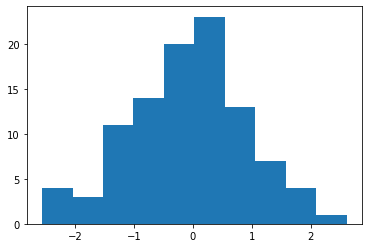

In [61]:
np.linspace(0.5,100, num=100)
plt.hist(np.random.randn(100));

In [62]:
# define random variables
x = np.linspace(0.5, 5, num=100)
y_lin = 0.5 * x + 0.1 * np.random.randn(100)
y_mon = np.exp(x) + 0.1 * np.random.randn(100)

In [63]:
# compute correlation
from scipy.stats import pearsonr, spearmanr
corr_lin_pearson = pearsonr(x, y_lin)[0]
corr_lin_spearman = spearmanr(x, y_lin)[0]
corr_mon_pearson = pearsonr(x, y_mon)[0]
corr_mon_spearman = spearmanr(x, y_mon)[0]

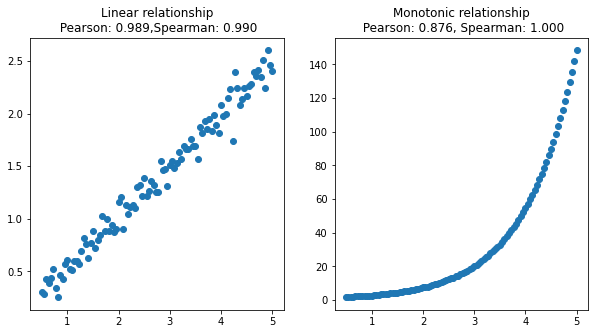

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(x, y_lin)
ax1.set_title(f"Linear relationship\n \
Pearson: {corr_lin_pearson:.3f},\
Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(x, y_mon)
ax2.set_title(f"Monotonic relationship\n \
Pearson: {corr_mon_pearson:.3f}, \
Spearman: {corr_mon_spearman:.3f}")
fig.savefig('figs/pearson_vs_spearman.png', format="png")

In [65]:
# define a function for computing correlations
from scipy.stats import pearsonr, spearmanr

def compute_correlations(data, col):
    
    pearson_reg = pearsonr(data[col], data["registered"])[0]
    pearson_cas = pearsonr(data[col], data["casual"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]
    spearman_cas = spearmanr(data[col], data["casual"])[0]
    return pd.Series({"Pearson (registered)": pearson_reg,
                     "Pearson (casual)": pearson_cas,
                     "Spearman (registered)": spearman_reg,
                     "Spearman (casual)": spearman_cas})

In [66]:
cols = ["temp", "atemp", "hum", "windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)",
                               "Pearson (casual)",
                               "Spearman (registered)",
                               "Spearman (casual)"])

for col in cols:
    corr_data[col] = compute_correlations(preprocessed_data, col)
    
corr_data.T

,Pearson (registered),Pearson (casual),Spearman (registered),Spearman (casual)
temp,0.335361,0.459616,0.373196,0.570989
atemp,0.332559,0.454080,0.373014,0.570419
hum,-0.273933,-0.347028,-0.338480,-0.388213
windspeed,0.082321,0.090287,0.122936,0.122920


# Time-Series Analysis

In [67]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts, window=10, **kwargs):
# create dataframe for plotting
    plot_data = pd.DataFrame(ts)
    plot_data["rolling_mean"] = ts.rolling(window).mean()
    plot_data["rolling_std"] = ts.rolling(window).std()
    # compute p-value of Dickey-Fuller test
    p_value = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_value:.3f}")

In [68]:
# get daily rides
daily_rides = preprocessed_data[["dteday", "casual", "registered"]]
daily_rides = daily_rides.groupby("dteday").sum()

# convert index to DateTime object
daily_rides.index = pd.to_datetime(daily_rides.index)

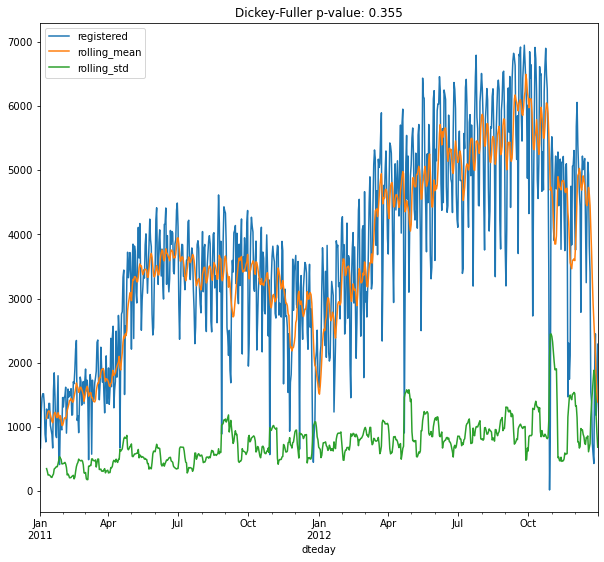

In [69]:
test_stationarity(daily_rides["registered"], figsize=(10,9))

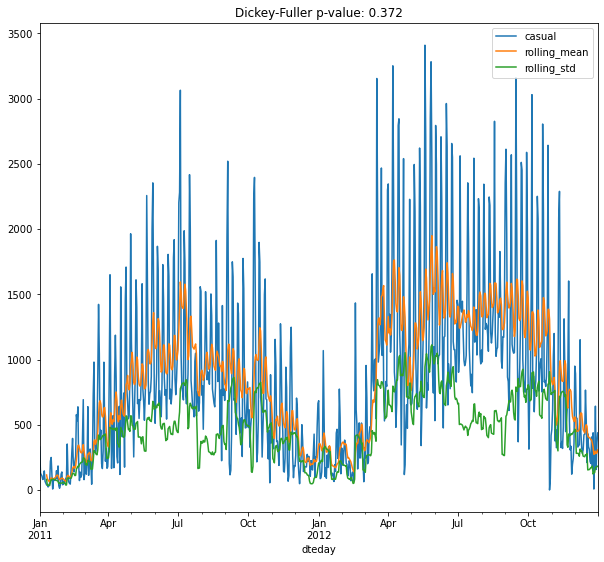

In [70]:
test_stationarity(daily_rides["casual"], figsize=(10,9))

A common way to detrend a time series and make it stationary is to subtract either its rolling mean or its last value, or to decompose it into a component that will contain its trend, seasonality, and residual components.

In [71]:
# subtract rolling mean
registered = daily_rides["registered"]
registered_ma = registered.rolling(10).mean()
registered_ma_diff = registered - registered_ma
registered_ma_diff.dropna(inplace=True)

In [72]:
casual = daily_rides["casual"]
casual_ma = casual.rolling(10).mean()
casual_ma_diff = casual - casual_ma
casual_ma_diff.dropna(inplace=True)

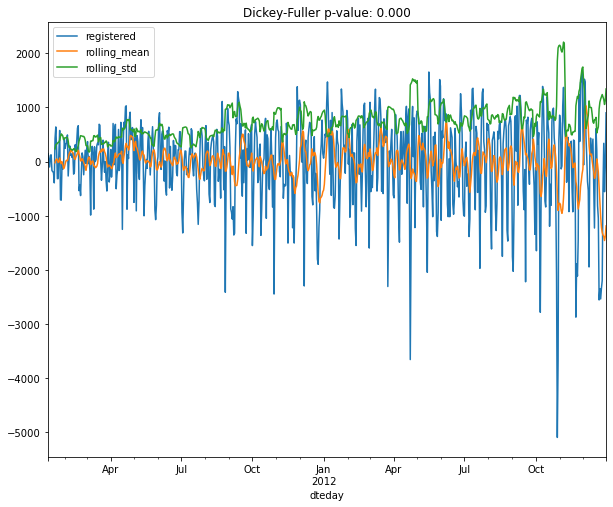

In [73]:
test_stationarity(registered_ma_diff, figsize=(10, 8))

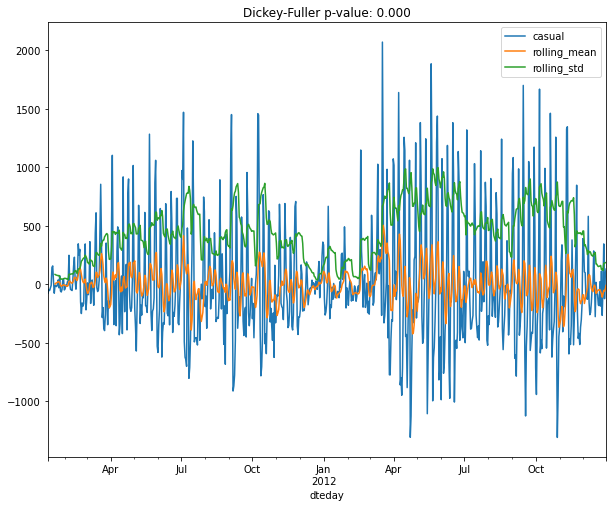

In [74]:
test_stationarity(casual_ma_diff, figsize=(10, 8))

In [75]:
# substract last value
registered = daily_rides["registered"]
registered_diff = registered - registered.shift()
registered_diff.dropna(inplace=True)

casual = daily_rides["casual"]
casual_diff = casual - casual.shift()
casual_diff.dropna(inplace=True)

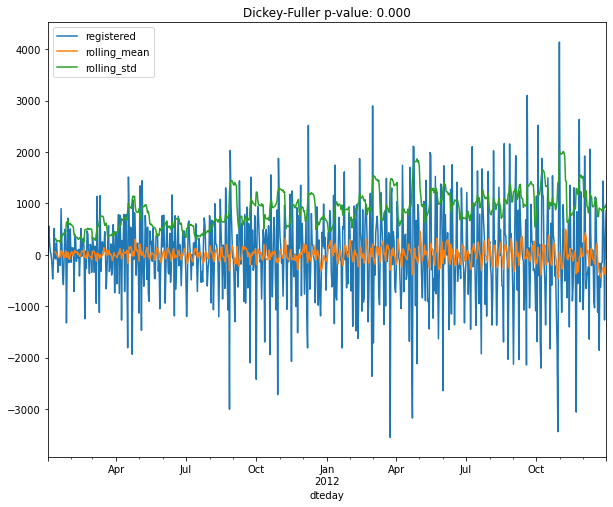

In [76]:
test_stationarity(registered_diff, figsize=(10, 8))

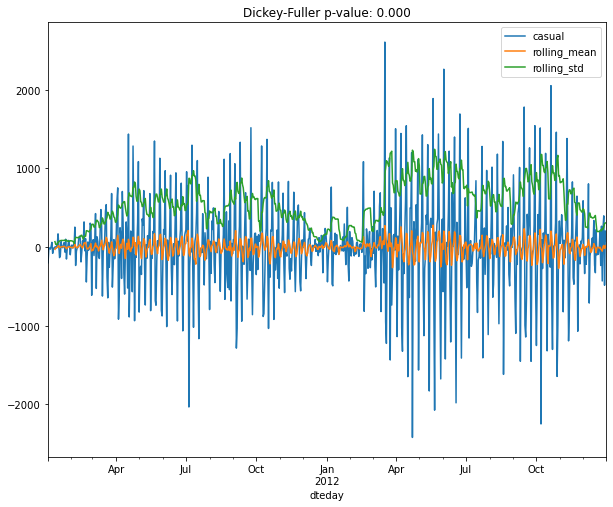

In [77]:
test_stationarity(casual_diff, figsize=(10, 8))

## Time Series Decomposition

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
registered_decomposition = seasonal_decompose(daily_rides["registered"])

casual_decomposition = seasonal_decompose(daily_rides["casual"])

In [80]:
# casual_decomposition.resid, casual_decomposition.trend, casual_decomposition.seasonal

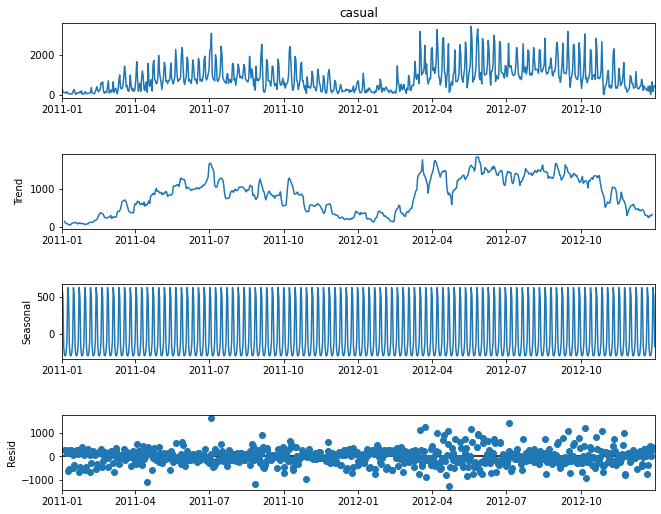

In [82]:
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

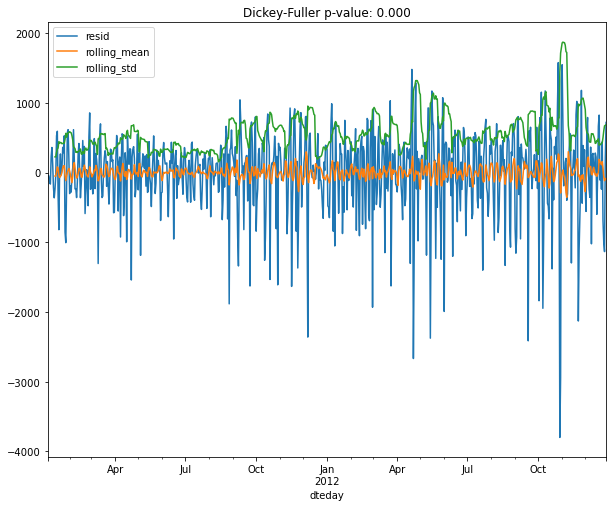

In [84]:
test_stationarity(registered_decomposition.resid.dropna(),
                 figsize=(10, 8))